# Computational Mathematics – Assignment 1
### Student: Inayatulla Noyan



## Selected function
#### f(x) = x^3 - x - 1

## Method 1: Bisection Method

In [81]:
def f(x):
    return x**3 - x - 1

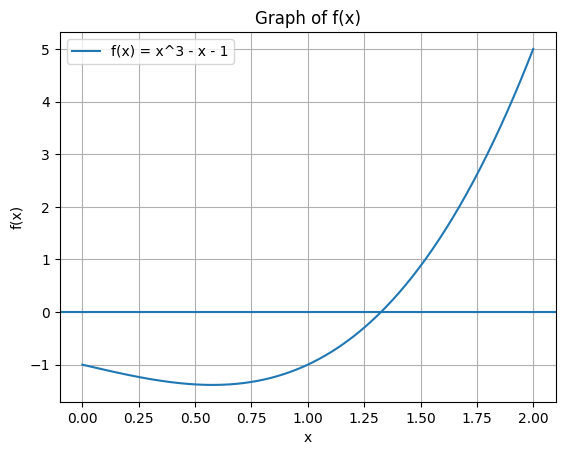

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# диапазон значений x
x = np.linspace(0, 2, 400)
y = f(x)

plt.plot(x, y, label="f(x) = x^3 - x - 1")
plt.axhline(0)  # линия y = 0
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Graph of f(x)")
plt.legend()
plt.grid(True)
plt.show()


In [23]:
import pandas as pd

def bisection_method(f, a, b, tol=1e-5, max_iter=100):
    if f(a) * f(b) >= 0:
        print("Error: f(a) and f(b) must have opposite sign")
        return None

    data = []
    prev_c = None

    for i in range(1, max_iter + 1):
        c = (a + b) / 2
        fc = f(c)

        error = abs(c - prev_c) \
        if prev_c is not None else None
        data.append([i, a, b, c, fc, error])

        if error is not None and error < tol:
            print("Stopped: tolerance reached")
            break

        if f(a) * fc < 0:
            b = c
        else:
            a = c

        prev_c = c

    return pd.DataFrame(
        data,
        columns=["Iteration", "a", "b", "c", "f(c)", "Error"]
    )

In [24]:
result = bisection_method(f, 1, 2)
result


Stopped: tolerance reached


,Iteration,a,b,c,f(c),Error
0,1,1.000000,2.000000,1.500000,0.875000,NaN
1,2,1.000000,1.500000,1.250000,-0.296875,0.250000
2,3,1.250000,1.500000,1.375000,0.224609,0.125000
3,4,1.250000,1.375000,1.312500,-0.051514,0.062500
4,5,1.312500,1.375000,1.343750,0.082611,0.031250
5,6,1.312500,1.343750,1.328125,0.014576,0.015625
6,7,1.312500,1.328125,1.320312,-0.018711,0.007812
7,8,1.320312,1.328125,1.324219,-0.002128,0.003906
8,9,1.324219,1.328125,1.326172,0.006209,0.001953
9,10,1.324219,1.326172,1.325195,0.002037,0.000977


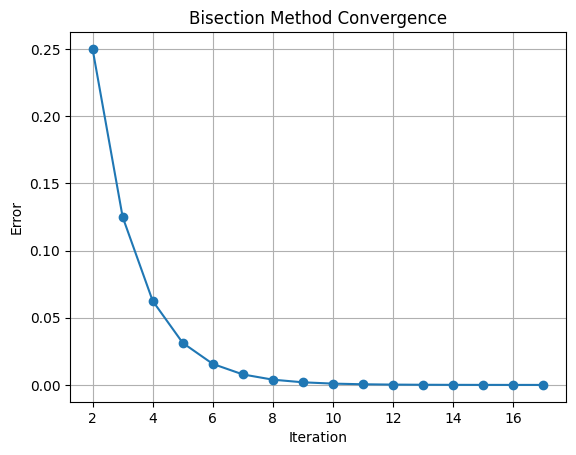

In [25]:
import matplotlib.pyplot as plt

plt.plot(result["Iteration"], result["Error"], marker="o")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Bisection Method Convergence")
plt.grid(True)
plt.show()


The bisection method successfully converged.
The root is approximately x ≈ 1.325.
The stopping criterion was reaching the given tolerance.
The method is stable but converges slowly.

## Method 2: Fixed-Point Iteration

In [88]:
# определяем g(x)
def g(x):
    return (x + 1) ** (1/3)

In [83]:
def fixed_point_method(g, x0, tol=1e-5, max_iter=50):
    data = []
    prev_x = x0

    for i in range(1, max_iter + 1):
        x = g(prev_x)
        error = abs(x - prev_x)

        data.append([i, x, error])

        if error < tol:
            print("Stopped: tolerance reached")
            break

        prev_x = x

    return pd.DataFrame(
        data,
        columns=["Iteration", "x", "Error"]
    )

In [84]:
result_fp = fixed_point_method(g, x0 = 1)
result_fp

Stopped: tolerance reached


,Iteration,x,Error
0,1,1.259921,0.259921
1,2,1.312294,0.052373
2,3,1.322354,0.010060
3,4,1.324269,0.001915
4,5,1.324633,0.000364
5,6,1.324702,0.000069
6,7,1.324715,0.000013
7,8,1.324717,0.000002


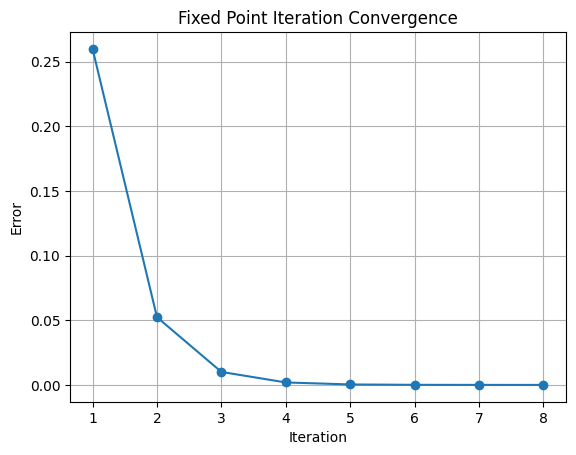

In [85]:
import matplotlib.pyplot as plt

plt.plot(result_fp["Iteration"], result_fp["Error"], marker="o")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Fixed Point Iteration Convergence")
plt.grid(True)
plt.show()


##### The method is simple but may fail if the convergence condition |g'(x)| < 1 is not satisfied.
##### The stopping criterion was reaching the given tolerance.


## Method 3: Newton-Raphson method


In [33]:
#производная
def df(x):
    return 3*x**2 - 1

In [35]:
import pandas as pd

def newton_method(f, df, x0, tol=1e-5, max_iter=50):
    data = []
    prev_x = x0

    for i in range(1, max_iter + 1):
        if df(prev_x) == 0:
            print("Stopped: Derivative is zero")
            break

        x = prev_x - f(prev_x) / df(prev_x)
        error = abs(x - prev_x)

        data.append([i, x, f(x), error])

        if error < tol:
            print("Stopped: tolerance reached")
            break

        prev_x = x

    return pd.DataFrame(
        data,
        columns=["Iteration", "x", "f(x)", "Error"]
    )


In [36]:
result_newton = newton_method(f, df, x0=1.5)
result_newton


Stopped: tolerance reached


,Iteration,x,f(x),Error
0,1,1.347826,1.006822e-01,1.521739e-01
1,2,1.325200,2.058362e-03,2.262569e-02
2,3,1.324718,9.243778e-07,4.822250e-04
3,4,1.324718,1.865175e-13,2.167543e-07


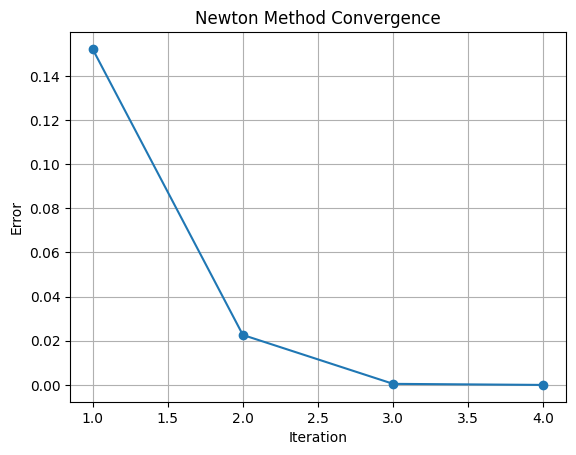

In [37]:
import matplotlib.pyplot as plt

plt.plot(result_newton["Iteration"], result_newton["Error"], marker="o")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Newton Method Convergence")
plt.grid(True)
plt.show()


##### The Newton–Raphson method converged very fast.
##### The method uses the first derivative of the function.
##### The stopping criterion was reaching the given tolerance.
##### The method may fail if the derivative is zero or the initial guess is poor.


## Method 4: Secant Method

In [54]:
import numpy as np

def f(x):
    return x*np.exp(x) - np.sin(x)



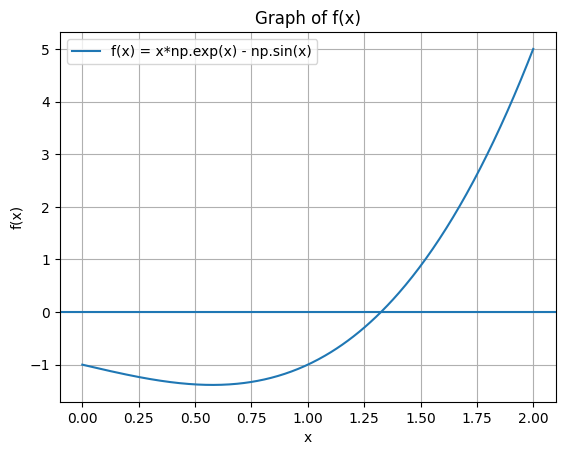

In [91]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - x - 1

# диапазон значений x
x = np.linspace(0, 2, 400)
y = f(x)

plt.plot(x, y, label="f(x) = x*np.exp(x) - np.sin(x)")
plt.axhline(0)  # линия y = 0
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Graph of f(x)")
plt.legend()
plt.grid(True)
plt.show()


In [56]:
import pandas as pd

def secant_method(f, x0, x1, tol=1e-5, max_iter=50):
    data = []
    prev_x = x0
    curr_x = x1

    for i in range(1, max_iter + 1):
        f_prev = f(prev_x)
        f_curr = f(curr_x)

        denom = (f_curr - f_prev)
        if denom == 0:
            print("Stopped: division by zero")
            break

        x_next = curr_x - f_curr * (curr_x - prev_x) / denom

        error = abs(x_next - curr_x)

        data.append([i, x_next, f(x_next), error])

        if error < tol:
            print("Stopped: tolerance reached")
            break

        prev_x, curr_x = curr_x, x_next

    return pd.DataFrame(
        data,
        columns=["Iteration", "x", "f(x)", "Error"])

In [57]:
result_secant = secant_method(f, x0=-3, x1=-2, tol=1e-5, max_iter=50)
result_secant


Stopped: tolerance reached


,Iteration,x,f(x),Error
0,1,-2.987260,3.087034e-03,9.872598e-01
1,2,-2.992055,-1.173203e-03,4.795458e-03
2,3,-2.990735,4.606800e-07,1.320595e-03
3,4,-2.990735,6.830195e-11,5.183524e-07


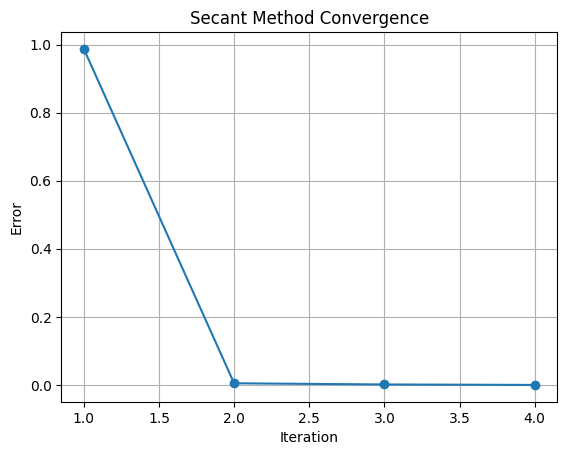

In [58]:
import matplotlib.pyplot as plt

plt.plot(result_secant["Iteration"], result_secant["Error"], marker="o")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Secant Method Convergence")
plt.grid(True)
plt.show()


In [59]:
root = result_secant.iloc[-1]["x"]
root, f(root)

(np.float64(-2.9907352296549705), np.float64(6.830194743123741e-11))

In [60]:
import numpy as np

for x in [-4, -3, -2, -1, 0]:
    print(x, f(x))


-4 -0.8300650508628649
-3 -0.008241197043724613
-2 0.6386268603524563
-1 0.47359154363645417
0 0.0


The secant method converged successfully.
The method does not require the derivative of the function.
It converges faster than bisection but may be unstable.
The stopping criterion was reaching the given tolerance.

## Method 5: False-Position Method

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

def f(x):
    return x**3 - x - 1

In [63]:
def false_position_method(f, a, b, tol=1e-5, max_iter=50):
    fa, fb = f(a), f(b)

    if fa * fb >= 0:
        print("Stopped: f(a) and f(b) must have opposite signs")

    data = []
    prev_x = None

    for i in range(1, max_iter + 1):

        # точка перескчения секущей с осью х
        x = (a * fb - b * fa) / (fb - fa)
        fx = f(x)

        error = abs(x - prev_x) if prev_x is not None else None

        data.append([i, a, b, x, fx, error])

        if error is not None and error < tol:
            print("Stopped: tolerance reached")
            break

        # сохраняем интервал со сменой знака
        if fa * fx < 0:
            b, fb = x, fx
        else:
            a, fa = x, fx

        prev_x = x

    return pd.DataFrame(
        data,
        columns=["Iteration", "a", "b", "x", "f(x)", "Error"]
    )

In [64]:
result_false = false_position_method(f, a=1, b=2, tol=1e-5, max_iter=50)
result_false


Stopped: tolerance reached


,Iteration,a,b,x,f(x),Error
0,1,1.000000,2,1.166667,-0.578704,NaN
1,2,1.166667,2,1.253112,-0.285363,0.086445
2,3,1.253112,2,1.293437,-0.129542,0.040325
3,4,1.293437,2,1.311281,-0.056588,0.017844
4,5,1.311281,2,1.318989,-0.024304,0.007707
5,6,1.318989,2,1.322283,-0.010362,0.003294
6,7,1.322283,2,1.323684,-0.004404,0.001402
7,8,1.323684,2,1.324279,-0.001869,0.000595
8,9,1.324279,2,1.324532,-0.000793,0.000253
9,10,1.324532,2,1.324639,-0.000336,0.000107


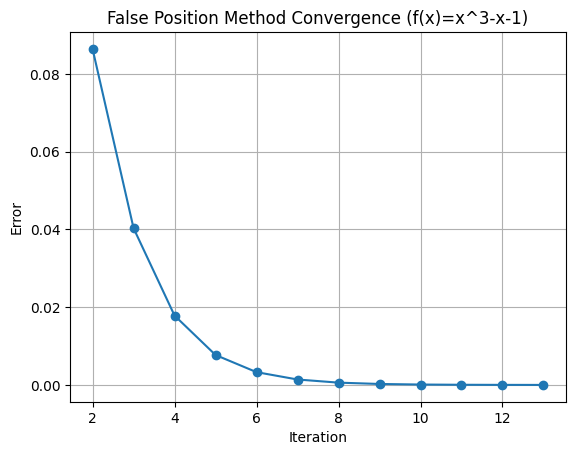

In [65]:
plt.plot(result_false["Iteration"], result_false["Error"], marker="o")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("False Position Method Convergence (f(x)=x^3-x-1)")
plt.grid(True)
plt.show()


In [66]:
root = result_false.iloc[-1]["x"]
root, f(root)


(np.float64(1.3247119440797213), np.float64(-2.5643798293728537e-05))

## Method 6: Muller's Method

In [76]:
def muller_method(f, x0, x1, x2, tol=1e-5, max_iter=50):
    data = []
    prev_x = x2

    for i in range(1, max_iter + 1):
        f0, f1, f2 = f(x0), f(x1), f(x2)

        h0 = x1 - x0
        h1 = x2 - x1

        # защита от деления на ноль
        if h0 == 0 or h1 == 0:
            print("Stopped: zero interval (h0 or h1 is zero)")
            break

        d0 = (f1 - f0) / h0
        d1 = (f2 - f1) / h1

        a = (d1 - d0) / (h1 + h0)
        b = a * h1 + d1
        c = f2

        disc = b*b - 4*a*c

        # если дискриминант отрицательный — выйдем (для real root задачи)
        if disc < 0:
            print("Stopped: negative discriminant (complex step)")
            break

        sqrt_disc = np.sqrt(disc)

        # выбираем знаменатель с большим модулем (стабильность)
        denom1 = b + sqrt_disc
        denom2 = b - sqrt_disc
        denom = denom1 if abs(denom1) > abs(denom2) else denom2

        if denom == 0:
            print("Stopped: denominator is zero")
            break

        dx = -2*c / denom
        x3 = x2 + dx

        error = abs(x3 - prev_x)
        data.append([i, x3, f(x3), error])

        if error < tol:
            print("Stopped: tolerance reached")
            break

        # сдвигаем точки
        x0, x1, x2 = x1, x2, x3
        prev_x = x3

    return pd.DataFrame(
        data,
        columns=["Iteration", "x", "f(x)", "Error"]
    )


In [77]:
result_muller = muller_method(f, x0=1, x1=1.5, x2=2, tol=1e-5, max_iter=50)
result_muller


Stopped: tolerance reached


,Iteration,x,f(x),Error
0,1,1.333333,3.703704e-02,6.666667e-01
1,2,1.324472,-1.050787e-03,8.861828e-03
2,3,1.324718,1.435714e-06,2.467889e-04
3,4,1.324718,7.149836e-13,3.366556e-07


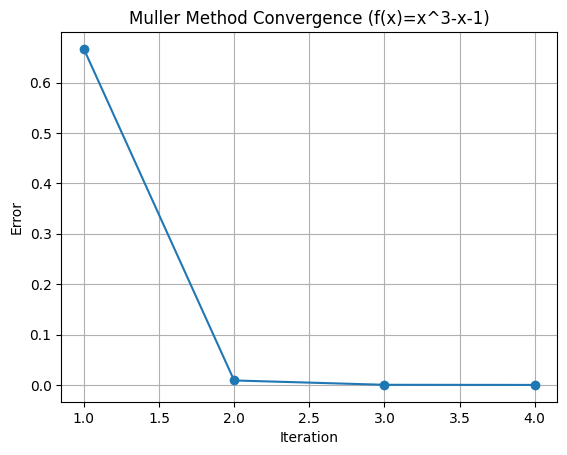

In [78]:
plt.plot(result_muller["Iteration"], result_muller["Error"], marker="o")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Muller Method Convergence (f(x)=x^3-x-1)")
plt.grid(True)
plt.show()


In [79]:
root = result_muller.iloc[-1]["x"]
root, f(root)


(np.float64(1.3247179572449137), np.float64(7.149836278586008e-13))

##### Muller’s method uses three points and fits a quadratic polynomial to approximate the root.
##### It converged fast for this function, but it may produce complex values if the discriminant becomes negative.
##### The stopping criterion was reaching the tolerance.

